## Comparison between PMT beta gamma simulation and Tl208PMT decays
### Note:
### Because of how the simulation is done, we expect the pmt betagamma to agree with the Tl208 only in the internal region. External regions and early hit tags will not work. The parameterization is not designed to reproduce that part. Gammas are injected very near the AV without their accompanying beta.

In [1]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import scipy, math
from scipy import stats
import jp_mpl as jplot
import jp_analysis as jp
import ntuple_tools
reload(ntuple_tools)

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


<module 'ntuple_tools' from '/home/jpyanez/snoplus/snoplus_python/ntuple_tools.pyc'>

In [2]:
basedir = '/home/jpyanez/scratch/snoplus/water_lowbkg/npy_reduced'
qpdt_prob_scale = 0.0149
rav = 6000.

In [7]:
var_names = ['nhitsCleaned',
             'inTimeHits100',
             'beta14',
             'itr',
             'posr',
             'udotr',
             'energy',
             'rprime']

In [8]:
# I'm going to be working with these files
#pmt_dirname = 
dirnames = ['LowBackground_Tl208PMT_6-17-6.exactly.dat',
                #'LowBackground_NeutronDecay_ExWater_6-17-6.exactly.dat',
                #'LowBackground_Tl208ExWater_6-17-6.exactly.dat',
                #'LowBackground_Bi214_6-17-6.exactly.dat',
                #'LowBackground_ProtonDecay_6-17-6.exactly.dat',
                #'LowBackground_Bi214ExWater_6-17-6.exactly.dat',
                #'LowBackground_ProtonDecay_ExWater_6-17-6.exactly.dat',
                #'LowBackground_NeutronDecay_6-17-6.exactly.dat',
                #'LowBackground_Tl208AV_6-17-6.exactly.dat',
            'Lbkgd_pmt3D_6ntuple',
            'Lbkgd_pmtGD_6ntuple',
            'Lbkgd_pmtbg_6ntuple'
               ]   
#              'LowBackground_Bi214_6-17-6.exactly.dat'

In [11]:
def loadData(dirname):
    # Load the data
    data = {}
    for one_var in var_names:
        data[one_var] = np.load(os.path.join(basedir, dirname, one_var+'.npy'))
        
    # Calculate the QPDT derived variables
    #data['qpdt_tcp'] = 1-((1-data['qpdtProbability'])**data['qpdtNhitsEarly'])
    #data['qpdt_ehp'] = stats.poisson.pmf(data['qpdtNhitsEarly'], data['nhitsCleaned']*qpdt_prob_scale)
    
    return data
    

In [12]:
# Loading the chosen MC sets
all_data = {}
for one_set in dirnames:
    this_label = one_set.split('d_')[1].split('_6')[0]
    print 'Doing', this_label
    all_data[this_label] = loadData(one_set)

Doing Tl208PMT
Doing pmt3D
Doing pmtGD
Doing pmtbg


In [14]:
for one_set in all_data:
    print one_set, all_data[one_set]['energy'].size

Tl208PMT 409280
pmtGD 21802
pmtbg 4138950
pmt3D 8336


## Basic histograms for tests

In [62]:
def compareHistograms(label='qpdtNhitsEarly',
                      xaxis = np.arange(0,7,1),
                      cut_value =1,
                      logy=False,
                      extra_cuts = {},
                      datasets = [],
                      ylim = [], normalize=True,
                      ax = False,
                      mycolor = False,
                      mylabel = False,
                      ):
    
    if not ax:
        fig = plt.figure(figsize=(8,5))
        ax  = fig.add_subplot(111)   
    else:
        ax.set_title(label)
    
    if len(datasets) == 0:
        datasets = all_data.keys()
    
    for ilabel, mcset in enumerate(datasets):
        
        if mcset == 'pmtbg':
            linestyle = '--'
        else:
            linestyle = '-'

        if mycolor:
            color = mycolor
        else:
            color =  'C'+"%i" % (ilabel+1)
                
        if mylabel:
            set_label = mylabel
        else:
            set_label = mcset
        
        bkgbool = np.ones_like(all_data[mcset]['energy'],dtype=bool)
            
        for one_cut in extra_cuts:
            bkgbool *= (all_data[mcset][one_cut] >= extra_cuts[one_cut][0])
            bkgbool *= (all_data[mcset][one_cut] <= extra_cuts[one_cut][1])
            
        bkgb, _ = np.histogram(all_data[mcset][label][bkgbool], xaxis)
        
        if normalize:
            bins = bkgb*1./bkgb.sum()
        else:
            bins = bkgb
        
        
        jplot.unfilledBar(xaxis, bins, label=set_label, color = color, linestyle =linestyle)
               

        bkg_above_cut = ((all_data[mcset][label]>=cut_value)*bkgbool).sum()*1./all_data[mcset][label][bkgbool].size
        #print mcset, 'above cut', bkg_above_cut, ' (mean ', all_data[mcset][label].mean(), ')'

    
    plt.axvline(cut_value, 0, 1, color='k', linestyle='--')
    
    
    plt.xlabel(label)
    plt.ylabel('Events PDF')
    plt.legend(loc=0)
    plt.tight_layout()
    if logy:
        plt.yscale('log')
    if len(ylim) > 0:
        plt.ylim(ylim)

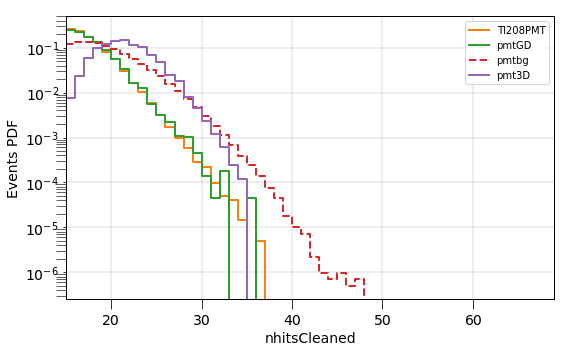

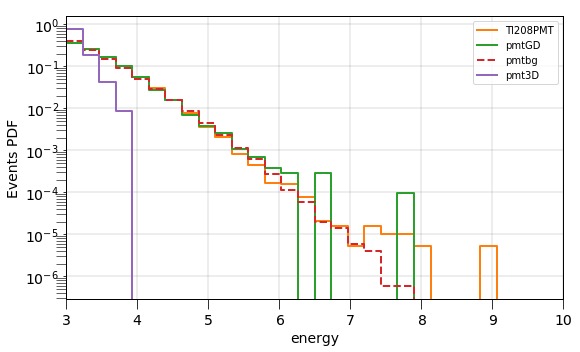

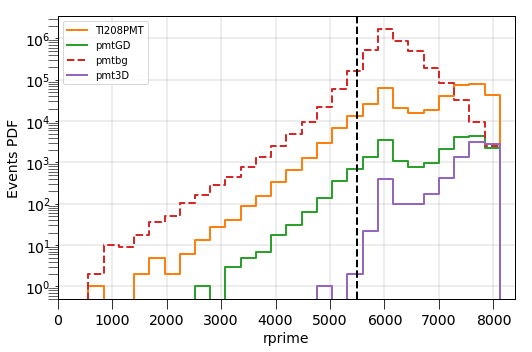

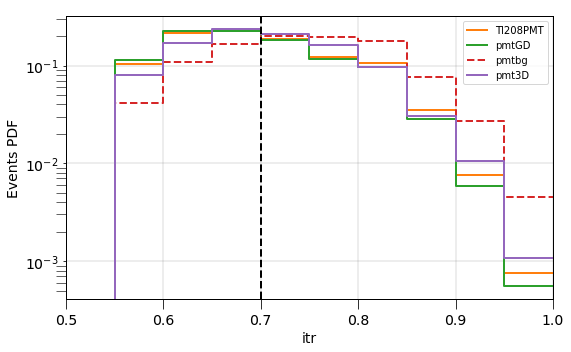

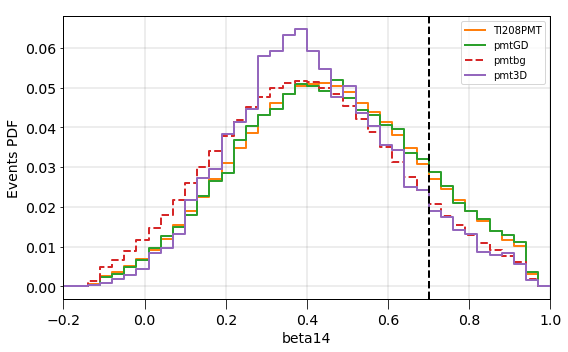

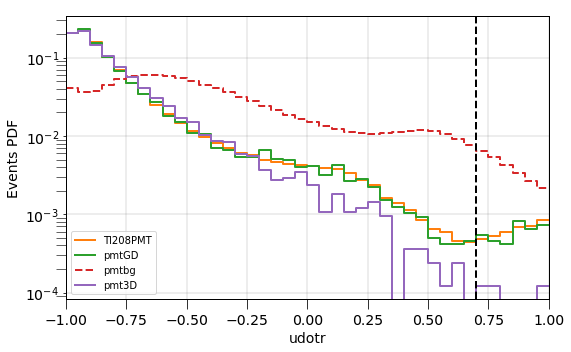

In [64]:
energy_histos = True
pos_histos = True
qpdt_histos = True
if energy_histos:
    # Energy histograms
    compareHistograms(label='nhitsCleaned',
                     xaxis=np.arange(15,70,1),
                      cut_value=5500,
                      logy=True)
    compareHistograms(label='energy',
                     xaxis=np.linspace(3, 10,31),
                      cut_value=5500,
                      logy=True)

if pos_histos:
    compareHistograms(label='rprime',
                     xaxis=np.linspace(0, 8400,31),
                      cut_value=5500,
                      normalize=False,
                      logy=True)
    compareHistograms(label='itr',
                     xaxis=np.linspace(0.5, 1,11),
                      cut_value=0.70,
                      logy=True)
    compareHistograms(label='beta14',
                     xaxis=np.linspace(-.2, 1,41),
                      cut_value=0.70,
                      logy=False)
    compareHistograms(label='udotr',
                     xaxis=np.linspace(-1., 1,41),
                      cut_value=0.70,
                      logy=True)

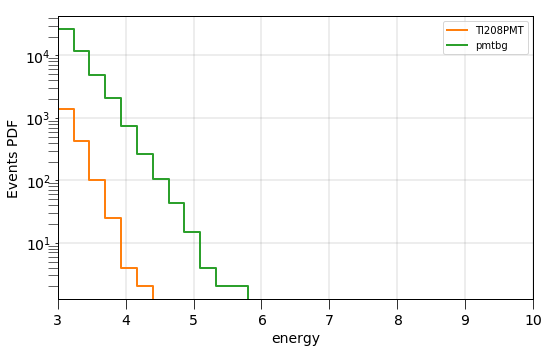

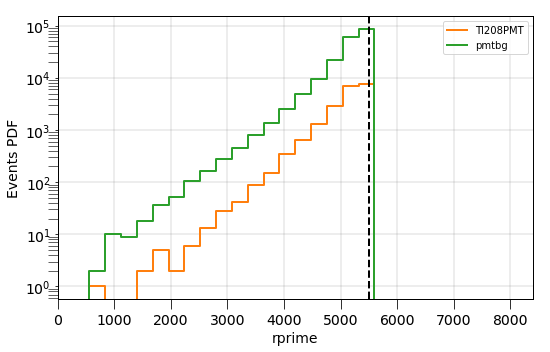

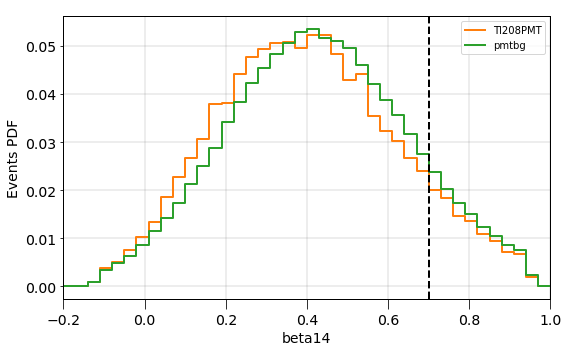

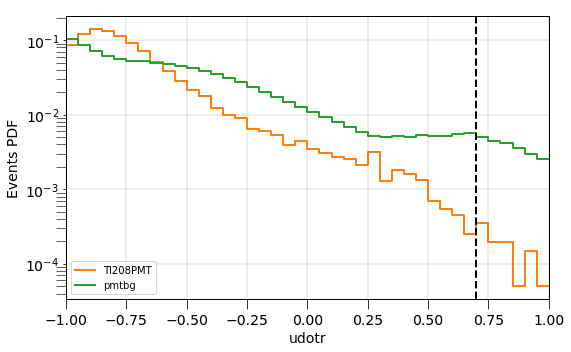

In [49]:
internal_cuts = {'rprime':[0, 5500.],
                 'energy':[2.5, 10.],
                 }
datasets = ['Tl208PMT', 'pmtbg']
compareHistograms(label='energy',
                 xaxis=np.linspace(3, 10,31),
                  cut_value=5500,
                  extra_cuts = internal_cuts, datasets = datasets,
                  normalize=False,
                  logy=True)

compareHistograms(label='rprime',
                 xaxis=np.linspace(0, 8400,31),
                  cut_value=5500,
                  normalize=False,
                  extra_cuts = internal_cuts, datasets = datasets,
                  logy=True)

compareHistograms(label='beta14',
                 xaxis=np.linspace(-.2, 1,41),
                  cut_value=0.70,
                  extra_cuts = internal_cuts, datasets = datasets,
                  logy=False)
compareHistograms(label='udotr',
                 xaxis=np.linspace(-1., 1,41),
                  cut_value=0.70,
                  extra_cuts = internal_cuts, datasets = datasets,
                  logy=True)

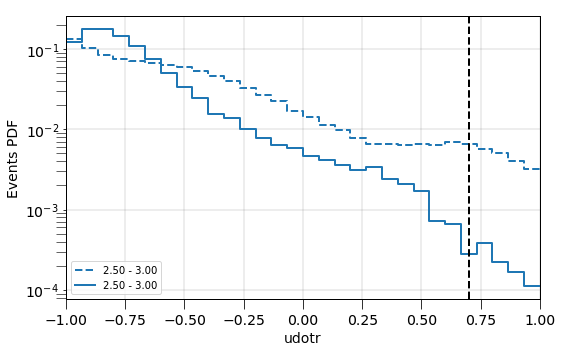

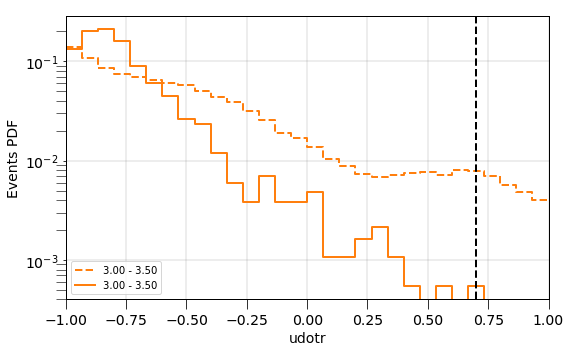

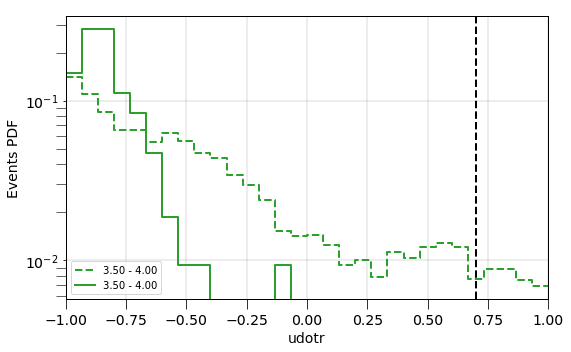

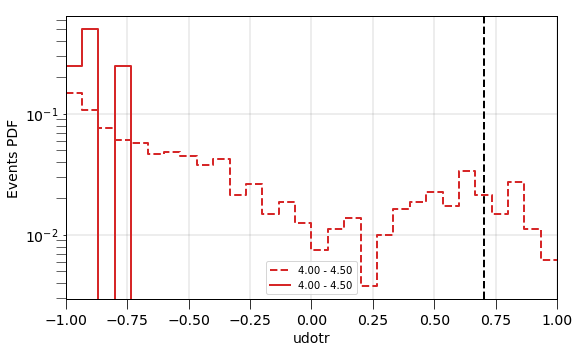

In [65]:
# Internal UdotR vs energy for PMT beta gammas Tl208
internal_cuts = {'energy':[2.5, 4.5],
                 'rprime':[0,5500.],
                 }
datasets = ['pmtbg', 'Tl208PMT']
#fig = plt.figure(figsize=(8,5))
#ax  = fig.add_subplot(111)

ebins = np.linspace(2.5, 4.5, 5)

for i in range(len(ebins)-1):
    internal_cuts['energy'] = [ebins[i], ebins[i+1]]
    mylabel = (' - ').join(["%0.2f" % x for x in internal_cuts['energy']])

    compareHistograms(label='udotr',
                     xaxis=np.linspace(-1., 1,31),
                      cut_value=0.70,
                      extra_cuts = internal_cuts, datasets = datasets,
                      #ax=ax,
                      mylabel=mylabel,
                      mycolor='C'+"%i" % i,
                      logy=True)

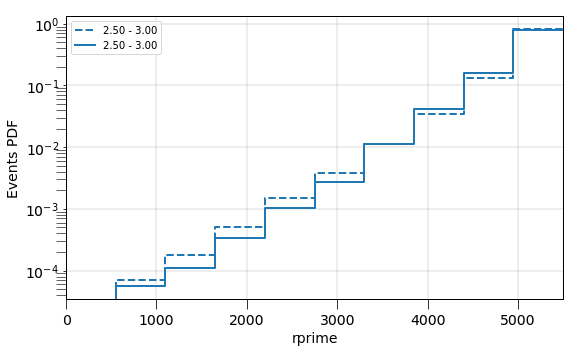

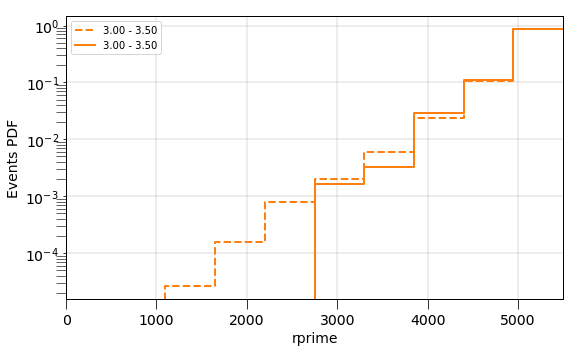

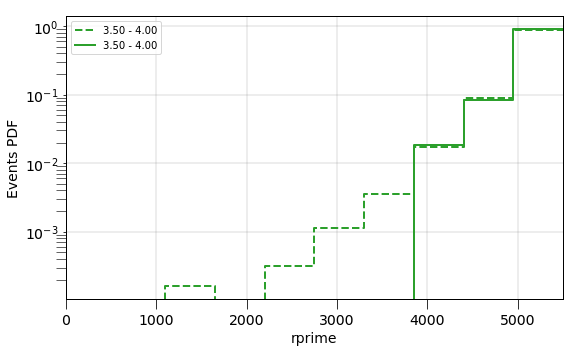

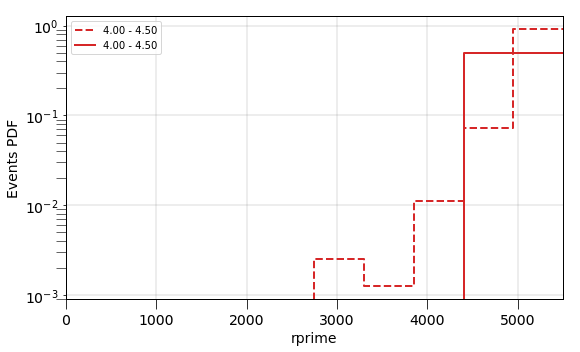

In [66]:
# Internal UdotR vs energy for PMT beta gammas Tl208
internal_cuts = {'energy':[2.5, 4.5],
                 'rprime':[0,5500.],
                 }
datasets = ['pmtbg', 'Tl208PMT']


ebins = np.linspace(2.5, 4.5, 5)

for i in range(len(ebins)-1):
    internal_cuts['energy'] = [ebins[i], ebins[i+1]]
    mylabel = (' - ').join(["%0.2f" % x for x in internal_cuts['energy']])

    compareHistograms(label='rprime',
                     xaxis=np.linspace(0,5500, 11),
                      cut_value=0.70,
                      extra_cuts = internal_cuts, datasets = datasets,
                      mylabel=mylabel,
                      mycolor='C'+"%i" % i,
                      logy=True)

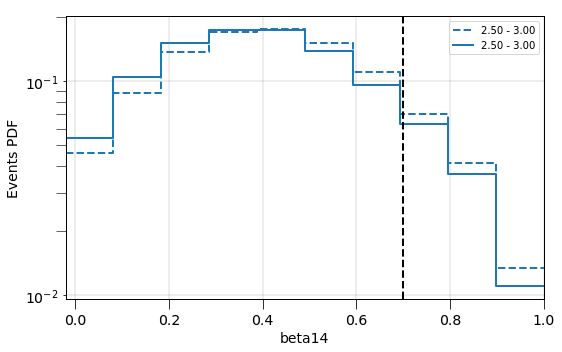

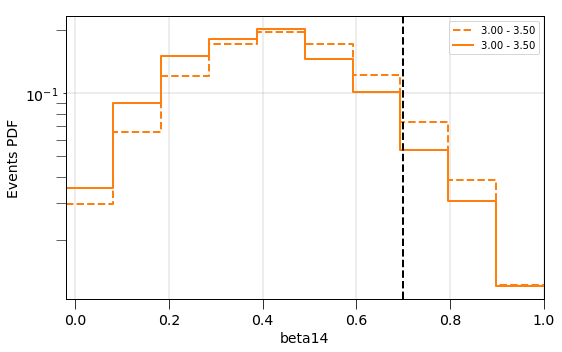

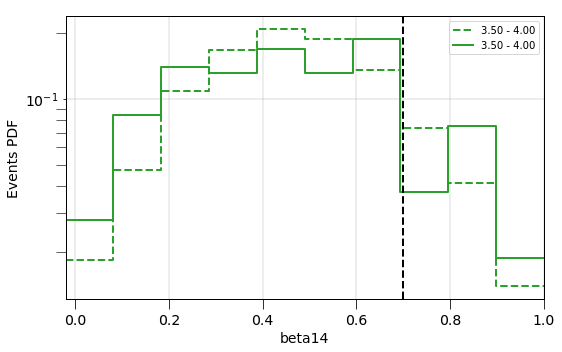

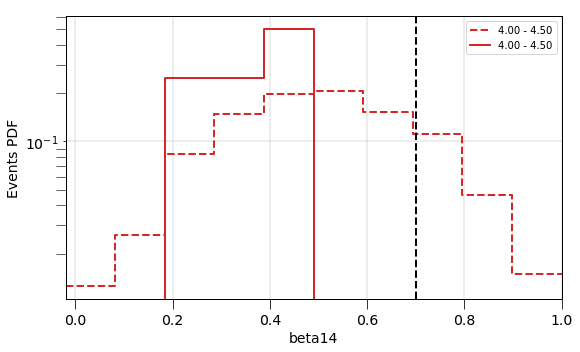

In [67]:
# Internal UdotR vs energy for PMT beta gammas Tl208
internal_cuts = {'energy':[2.5, 4.5],
                 'rprime':[0,5500.],
                 }
datasets = ['pmtbg', 'Tl208PMT']


ebins = np.linspace(2.5, 4.5, 5)

for i in range(len(ebins)-1):
    internal_cuts['energy'] = [ebins[i], ebins[i+1]]
    mylabel = (' - ').join(["%0.2f" % x for x in internal_cuts['energy']])

    compareHistograms(label='beta14',
                     xaxis=np.linspace(-.02,1, 11),
                      cut_value=0.70,
                      extra_cuts = internal_cuts, datasets = datasets,
                      mylabel=mylabel,
                      mycolor='C'+"%i" % i,
                      logy=True)

In [44]:
if ax: print 'hi'

hi
